In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.simplefilter('ignore')

In [24]:
diabetes_prev_df = pd.read_csv('../data/diabetes_prev_edited.csv')
mortlife_simple_df = pd.read_csv('../data/mortlife_simple.csv')
lifeExp_key_df = pd.read_csv('../data/lifeExp_key.csv')
lifeExp_2017_df = pd.read_csv('../data/lifeExp_2017.csv')
mort_key_df = pd.read_csv('../data/mort_key.csv')
mort_2017_df = pd.read_csv('../data/mort_2017.csv')
pop_key_df = pd.read_csv('../data/port_key.csv')
pop_2017_df = pd.read_csv('../data/port_2017.csv')
all_county_stats_2017_df = pd.read_csv('../data/all_county_stats_2017.csv')

# Diabetes Prevalence and Social Determinants of Health
## How certain are more at risk than others

#### By Michael Castillo, COMM2550

## Introduction

Diabetes has always consistently plagued the United States. However, it is becoming more evident that different population groups are disproportionately affected. As health care is shifting more towards population health outcomes and value-based care, social determinants of health are becoming more important. The disadvantages propagated by different factors such as race, ethnicity, income, education level, and insurance coverage suggest that more attention should be paid to ameliorating these inequities with policies at the individual, organizational, and policy level.

The main way to understand the impact of social determinants of health on diabetes is to look at diabetes prevalence and how it varies from county to county, based on the aforementioned factors.

## **Part I: Diabetes Prevalence (2017)**

### Which states are most affected?

Looking at county data for 2017, the mean data for every state should that District of Columbia, Colorado, and Massachusetts have the lowest diabetes prevalence. Meanwhile, Alabama, Mississippi, South Carolina, and West Virginia have the highest diabetes prevalence. Given these results, I was curious to understand what life expectancy, mortality rate, and population looks like for these states from 1992 to 2017.

In [76]:
state_prev = diabetes_prev_df.groupby('state_abbr').mean()
state_prev = state_prev.sort_values('db_prev')
state_prev[0:3]
state_prev[-4:]

             db_prev
state_abbr          
DC          8.100008
CO          8.358919
MA          8.950063
              db_prev
state_abbr           
WV          15.478795
SC          15.824131
MS          16.112726
AL          16.931816


#### Does the type of county matter?

Counties are categorized as either metropolitan or non-metropolitan. The assumption is that metropolitan counties have more urban cities, and therefore more diverse populations, including race, education, and income among other factors. On the other hand, non-metropolitan counties are assumed to have more uniform populations and most importantly more limited access to care. The results show that diabetes prevalence is indeed higher in non-metropolitan areas by almost 1% more.

In [6]:
metro_prev = diabetes_prev_df.groupby('metro_nonmetro').mean()
metro_prev.sort_values('db_prev')

,db_prev
metro_nonmetro,
metropolitan,11.695565
nonmetropolitan,12.668781


Breaking down prevalence by its categorical level (very low, low, medium, high, and very high), shows non-metropolitan counties are more likely to have high diabetes prevalence(above 12%). This finding agrees with the aforementioned assumption that non-metropolitan counties have different access to medical care, resources, and opportunities for improved lifestyle that disproportionately affect these populations.

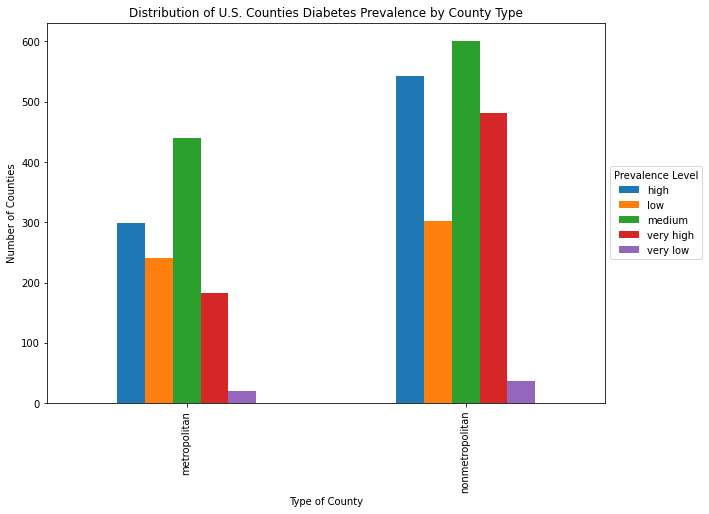

In [7]:
prev_levels = diabetes_prev_df.groupby(['metro_nonmetro','prev_level']).size().unstack().plot(kind='bar',figsize=(10,7))
plt.xlabel('Type of County')
plt.ylabel('Number of Counties')
plt.title('Distribution of U.S. Counties Diabetes Prevalence by County Type')
plt.legend(title='Prevalence Level', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

## **Part II: State Data** 

Understanding that Alabama, Mississippi, South Carolina, and West Virginia have the highest diabetes prevalence, brings up the question of how life expectancy, mortality, and population vary in these groups over time. Does the data agree? More importantly, are certain race and ethnicity groups more at risk? How does it compare to Colorado, the state with the lowest prevalence in 2017?

### How does life expectancy vary for the states with highest prevalence?

Focusing on life expectancy, I looked at data every five years from 1992 to 2017 in the key states mentioned above. It is clear that states with higher diabetes prevalence tend to have a lower life expectancy compared to Colorado. Nevertheless, life expectancy tends to increase over time for all states. What this data suggests is that diabetes prevalence is potentially correlated to life expectancy such that a greater prevalence results in a lower life expectancy. This makes sense given the detriment of chronic health conditions like diabetes to quality of life.

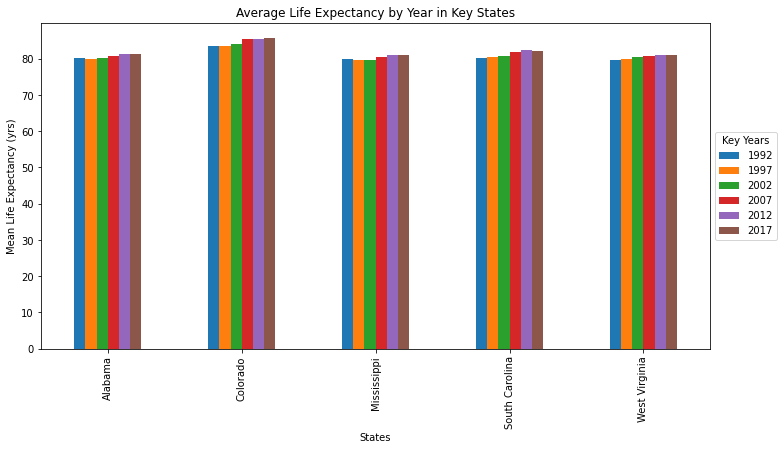

In [16]:
lifeExp_key = lifeExp_key_df.groupby(['state_name','year_id']).mean('val')
pivoted_lifeExp_key = lifeExp_key.reset_index().pivot(index='state_name', columns=['year_id'], values='val')
pivoted_lifeExp_key.plot(kind='bar', figsize=(12,6))
plt.xlabel('States')
plt.ylabel('Mean Life Expectancy (yrs)')
plt.title('Average Life Expectancy by Year in Key States')
plt.legend(title='Key Years', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Next, I focused solely on 2017 to make connections to diabetes prevalence. It is important to not that there is no data reported for race/ethnicity other than Black (non-Hispanic) and White (non-Hispanic), except for Colorado. However, in all cases, life expectancy is better for White populations, compared to the state average (red). If greater diabetes prevalence is correlated to lower life expectancy, this table suggests that white populations are less affected by diabetes. In every state but Colorado, life expectancy is greater for White populations than Black populations. This suggests that if anything, in states with thee greatest diabetes prevalence, Black populations are disproportionately at risk. Interestingly, in Colorado, the Other Race (non-Hispanic) group has the highest life expectancy, greater than the state average (red).

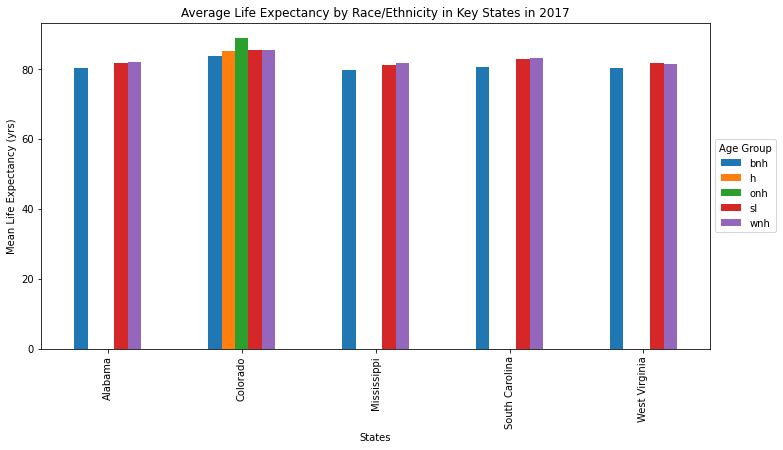

In [15]:
lifeExp_2017 = lifeExp_2017_df.groupby(['state_name','year_id','eth_short']).mean('val')
wide_lifeExp_2017 = lifeExp_2017.reset_index().pivot(index='state_name', columns='eth_short', values='val')
wide_lifeExp_2017.plot(kind='bar', figsize=(12,6))
plt.xlabel('States')
plt.ylabel('Mean Life Expectancy (yrs)')
plt.title('Average Life Expectancy by Race/Ethnicity in Key States in 2017')
plt.legend(title='Age Group', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### What about mortality rate?

Knowing that diabetes prevalence has a negative correlation with life expectancy, it would be interesting to see if mortality rate has the same effect. Looking at the graph, mortality rate is greatest for Alabama, West Virginia, and Mississippi, which also happen to be the states with the highest diabetes prevalence. It is interesting that They follow a similar rate of decline starting from the early 2000s. Meanwhile, South Carolina saw an increase from 2000 to 2005, but then started decreasing at different rates for the last 10 years. Nonetheless, mortality rate generally declines in all states. However, despite this decrease, Mississippi and South Carolina are starting to show a rise in mortality rate. Colorado, which has the lowest diabetes prevalence has continued to decrease and remains very low.

Overall, this data also suggests that diabetes prevalence is correlated to mortality rate such that a greater prevalence results in a greater mortality rate.

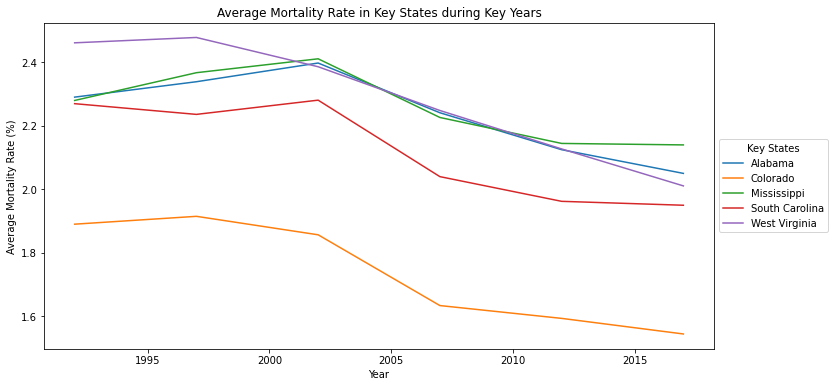

In [14]:
mort_key = mort_key_df.groupby(['state_name','year_id']).mean('val')
wide_mort_key = mort_key.reset_index().pivot(index='year_id', columns='state_name', values='val')
wide_mort_key.plot(kind='line', figsize=(12,6))
plt.xlabel('Year')
plt.ylabel('Average Mortality Rate (%)')
plt.title('Average Mortality Rate in Key States during Key Years')
plt.legend(title='Key States', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Looking only at 2017 data, there is no mortality rate data for race/ethnicity categories other than Black (non-Hispanic) and White (non-Hispanic) except in Colorado where all are present. In all cases, Black populations have the highest mortality rate, above state average (red). This is especially true in states with the greatest diabetes prevalence during this year (Alabama, West Virginia, Mississippi, and South Carolina). Like life expectancy data, the mortality rate data grouped by race and ethnicity indicate that Black populations are disproportionately affected by disease, including diabetes.

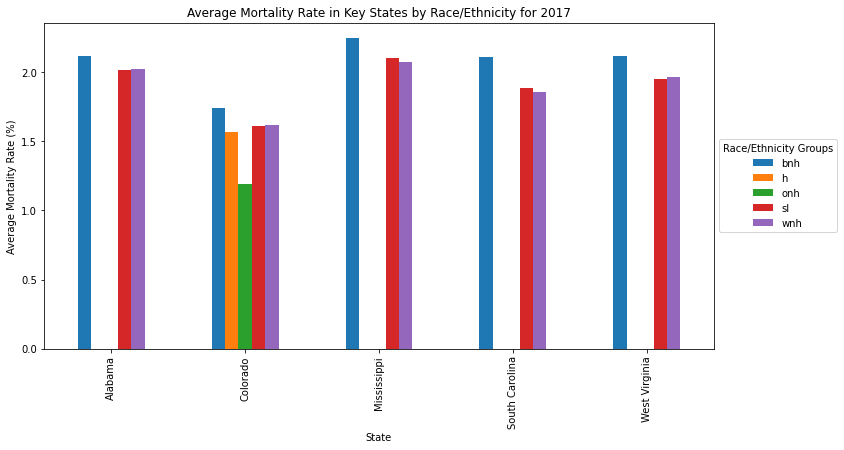

In [19]:
mort_2017 = mort_2017_df.groupby(['state_name','year_id','eth_short']).mean('val')
wide_mort_2017 = mort_2017.reset_index().pivot(index='state_name', columns='eth_short', values='val')
wide_mort_2017.plot(kind='bar', figsize=(12,6))
plt.xlabel('State')
plt.ylabel('Average Mortality Rate (%)')
plt.title('Average Mortality Rate in Key States by Race/Ethnicity for 2017')
plt.legend(title='Race/Ethnicity Groups', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### What is the population like in these states?

If Black populations are more at risk than other populations, could that be explained by the overall population distribution of the states with high diabetes prevalence?

Looking at the overall population in these states plus Colorado, it is clear that population remains fairly constant in Mississippi and West Virginia, with a slight increase but not very much in the latter. Similarly, Alabama and South Carolina show a more noticeable increase in population over the last 30 years. Meanwhile, Colorado has increased to be greater than the other four states by 2017, despite being third largest in 1990.

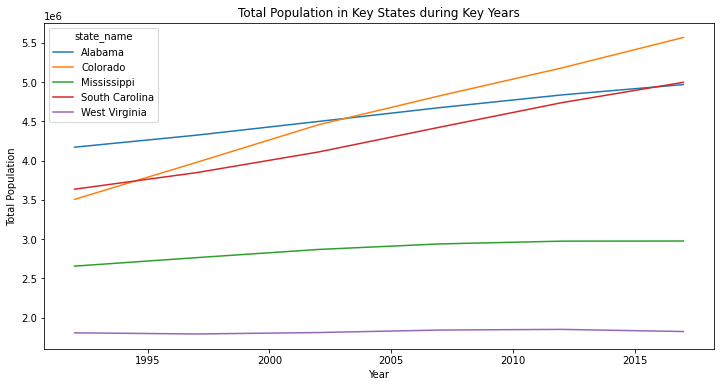

In [21]:
pop_key = pop_key_df.groupby(['state_name','year_id']).sum('val')/2
wide_pop_key = pop_key.reset_index().pivot(index='year_id', columns='state_name', values='val')
wide_pop_key.plot(kind='line', figsize=(12,6))
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Total Population in Key States during Key Years')
plt.show()

Finally, looking at populations in 2017 by race and ethnicity, the data agrees with the graph above. Colorado has the greatest population size in 2017. Moreover, in all states, the majority of the population is White (non-Hispanic). States with the greatest diabetes prevalence have much greater White populations (non-Hispanic), yet the Black population has a greater mortality rate despite the smaller size. This is especially true for West Virginia which a very small Black population.

**Understanding this, why are Black populations more at risk? Are there social determinants of health, such as income, education, and insurance coverage, that exacerbate health disparities and inequities so that minority populations have a greater prevalence of diabetes?**

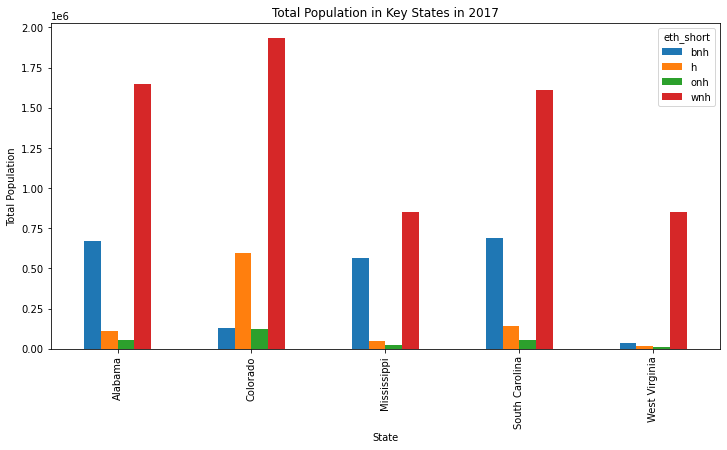

In [23]:
pop_2017 = pop_2017_df.groupby(['state_name','year_id','eth_short']).sum('val')/2
wide_pop_2017 = pop_2017.reset_index().pivot(index='state_name', columns='eth_short', values='val')
wide_pop_2017.plot(kind='bar', figsize=(12,6))
plt.xlabel('State')
plt.ylabel('Total Population')
plt.title('Total Population in Key States in 2017')
plt.show()

## **Part III: County Data (2017)**

### Looking at economic factors

#### Poverty Rate

Regardless of the type of county, poverty rate seems to have a a slight positive correlation to diabetes rate. That is to say, counties with a higher population in poverty show higher diabetes prevalence. While this not true for most counties, for the counties that it is true for, higher poverty could be result in poor food choices and therefore a poor diet and higher tendencies for more weight and diabetes. Poor populations are also more likely to be enrolled in Medicaid, which is known to pay providers the least amount of money. While this requires further research, it is possible that more poor populations don't have access to the best preventative care, and are thus more at risk for diabetes.

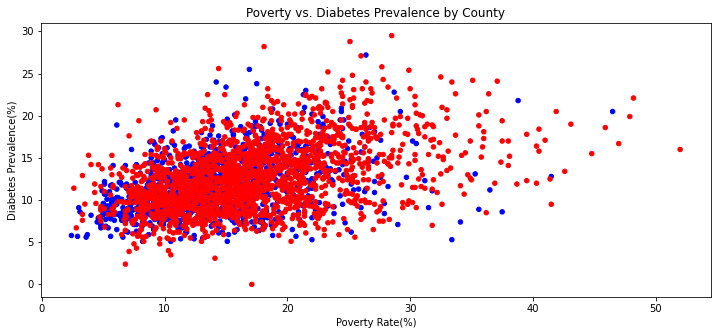

In [27]:
all_county_stats_2017_df.plot(kind='scatter', x='poverty_2017', y='db_prev',c='metro_colorcode',figsize=(12,10))
plt.xlabel('Poverty Rate(%)')
plt.ylabel('Diabetes Prevalence(%)')
plt.title('Poverty vs. Diabetes Prevalence by County')
plt.subplots_adjust(bottom=0.5)
plt.show()

#### Unemployment Rate

Looking at unemployment, there seems to be a slightly positive correlation between unemployment rate and diabetes prevalence. This is interesting given that insurance is often employer-sponsored in the U.S. The data shows that most counties have a low unemployment rate, less than 7%. But for counties on the higher end, diabetes prevalence tends to be greater suggesting that factors like poverty make minority groups more likely to be unemployed putting them at a disadvantage for diabetes.

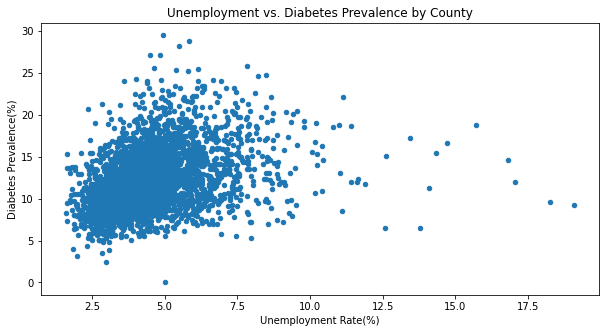

In [25]:
all_county_stats_2017_df.plot(kind='scatter', x='unemployment_rate_2017', y='db_prev',figsize=(10,5))
plt.xlabel('Unemployment Rate(%)')
plt.ylabel('Diabetes Prevalence(%)')
plt.title('Unemployment vs. Diabetes Prevalence by County')
plt.show()

#### Income level (Per capita income and median household income)

Knowing that poverty rate has a correlation to diabetes prevalence, it would be interesting to see if counties with higher income levels reflect a similar pattern. Interestingly, metropolitan counties (blue) are more dispersed towards higher income households. In fact, most counties with average household income above $60,000 are metropolitan. This could be due to more access to higher paying jobs when people are closer to cities or large urban areas. More importantly, higher income results in a much lower diabetes prevalence.

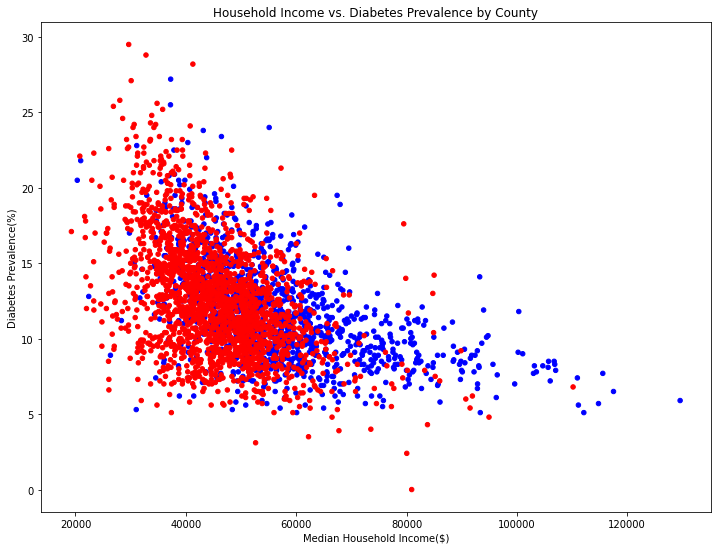

In [28]:
all_county_stats_2017_df.plot(kind='scatter', x='median_household_income_2017', y='db_prev',c='metro_colorcode',figsize=(12,10))
plt.xlabel('Median Household Income($)')
plt.ylabel('Diabetes Prevalence(%)')
plt.title('Household Income vs. Diabetes Prevalence by County')
plt.subplots_adjust(bottom=0.2)
plt.show()

Per capita income, which is the average income earned per person in a county, shows a very similar distribution of data. Not only do both graphs agree with the conclusion that metropolitan counties tend to have lower diabetes prevalence, but they demonstrate that is likely due to having more income. In other words, higher income means better insurance coverage and thus better access to treatment and prevention for diabetes, reducing prevalence.

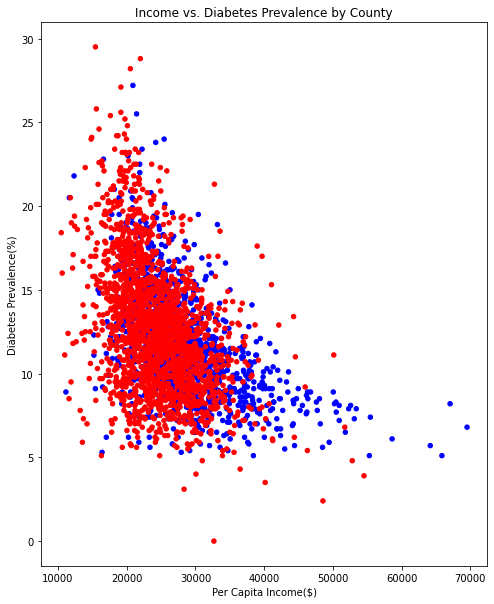

In [52]:
all_county_stats_2017_df.plot(kind='scatter', x='per_capita_income_2017', y='db_prev',c='metro_colorcode',figsize=(8,10))
plt.xlabel('Per Capita Income($)')
plt.ylabel('Diabetes Prevalence(%)')
plt.title('Income vs. Diabetes Prevalence by County')
plt.show()

### Looking at education factors

#### High school education

Looking at the high school graduation rate in each county, there seems to be a slight negative correlation such that a greater percentage of high school graduates leads to lower diabetes prevalence. Although most counties have a high school graduation rate greater than 70%, those counties on the lower end are more likely to have higher diabetes prevalence. This means that minority populations could be more at risk because of a lack of education.

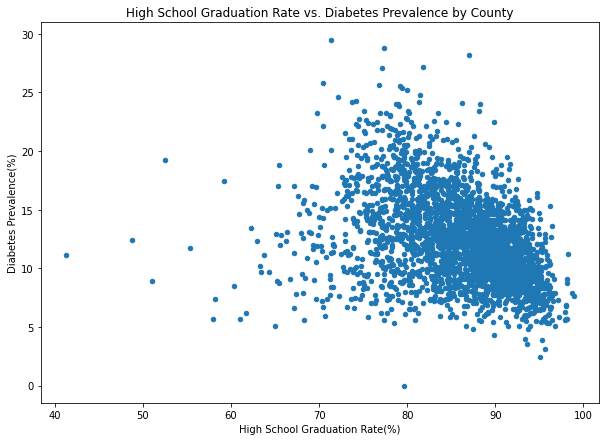

In [51]:
all_county_stats_2017_df.plot(kind='scatter', x='hs_grad_2017', y='db_prev',figsize=(10,7))
plt.xlabel('High School Graduation Rate(%)')
plt.ylabel('Diabetes Prevalence(%)')
plt.title('High School Graduation Rate vs. Diabetes Prevalence by County')
plt.show()

##### Is there a correlation to poverty?

Combining the previous data with poverty rate data, the result clearly shows that counties with higher graduation rates have lower poverty rates and lower diabetes prevalence. This suggests that in counties with higher prevalence, minority populations are most likely less educated and lower income. This combination make them likely more susceptible to diabetes as they have a harder time making better lifestyle choice and cannot afford the proper preventative care that higher income and/or more educated populations can.

<function matplotlib.pyplot.show(close=None, block=None)>

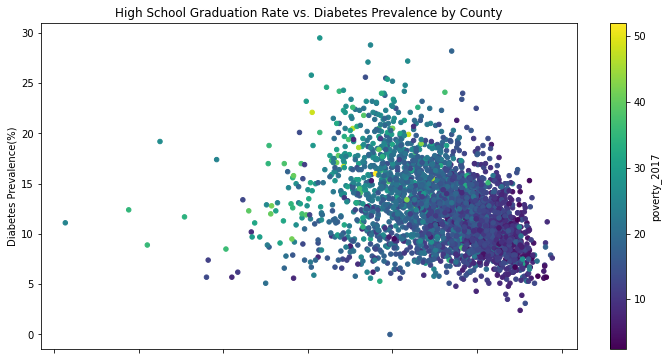

In [65]:
all_county_stats_2017_df.plot(kind='scatter', x='hs_grad_2017', y='db_prev',c='poverty_2017',figsize=(12,6))
plt.xlabel('High School Graduation Rate(%)')
plt.ylabel('Diabetes Prevalence(%)')
plt.title('High School Graduation Rate vs. Diabetes Prevalence by County')
plt.show

#### Bachelor's degree

This is further proven by bachelor's degree, which is much less common than a high school degree, especially in non-metropolitan counties. This suggest that metropolitan counties are more likely to be higher highly educated in addition to being more high income. Although correlation does not mean causation, it is possible that higher income individuals have a better opportunity to receive higher education which translates to lower chances for diabetes. Less than 30% of the population in non-metropolitan counties have a bachelor's degree, yet they have higher diabetes prevalence, above 10%.

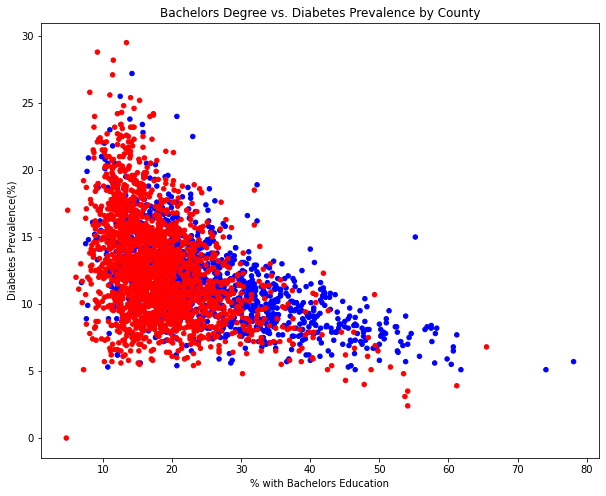

In [49]:
all_county_stats_2017_df.plot(kind='scatter', x='bachelors_2017', y='db_prev',c='metro_colorcode', figsize=(10,8))
plt.xlabel('% with Bachelors Education')
plt.ylabel('Diabetes Prevalence(%)')
plt.title('Bachelors Degree vs. Diabetes Prevalence by County')
plt.show()

##### What is the correlation to poverty?

Similar to high school graduation rates, the percent of the population with a bachelor's degree decreases with poverty level. In other words, wealthier counties have lower diabetes prevalence and more college graduates.

<function matplotlib.pyplot.show(close=None, block=None)>

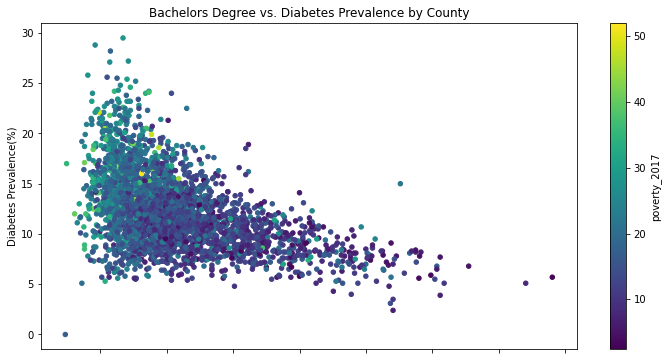

In [48]:
all_county_stats_2017_df.plot(kind='scatter', x='bachelors_2017', y='db_prev',c='poverty_2017',figsize=(12,6))
plt.xlabel('% with Bachelors Education')
plt.ylabel('Diabetes Prevalence(%)')
plt.title('Bachelors Degree vs. Diabetes Prevalence by County')
plt.show

### Looking at insurance coverage

Evidently, income and education level limit who has access to the right type of care, with higher income and more educated individuals likely having access to better preventative care and treatment.

#### What is the correlation to poverty rate?

Generally, as the rate of poverty in a county increases, the percent of the population that is uninsured also increases. This trend also reflects the increase in diabetes prevalence that was discussed earlier, with poorer counties more higher prevalence and more uninsured populations.

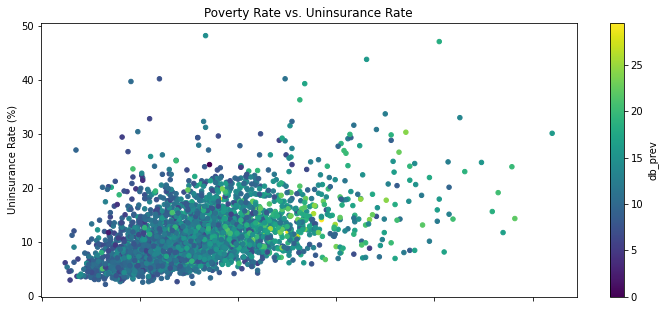

In [37]:
all_county_stats_2017_df.plot(kind='scatter', x='poverty_2017', y='uninsured_2017',c='db_prev',figsize=(12,10))
plt.xlabel('Poverty Rate (%)')
plt.ylabel('Uninsurance Rate (%)')
plt.title('Poverty Rate vs. Uninsurance Rate')
plt.subplots_adjust(bottom=0.5)
plt.show()

#### What is the correlation to income?

##### Median Household Income

Moreover, it is clear that as the median household income increases in counties, the percent of the population that is uninsured decreases, and once again diabetes prevalence also reflects this pattern. Lower income counties show a greater distribution in insurance coverage and higher diabetes prevalence.

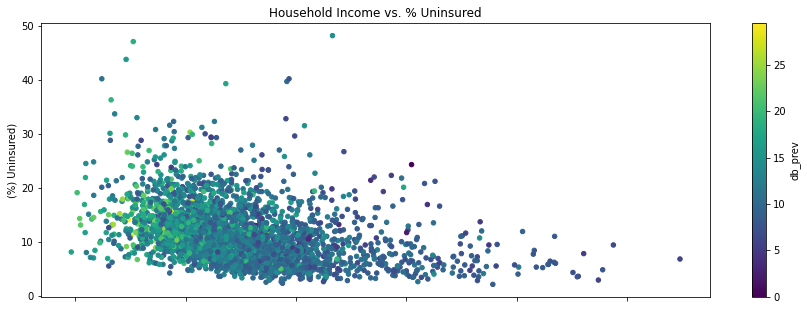

In [40]:
all_county_stats_2017_df.plot(kind='scatter', x='median_household_income_2017', y='uninsured_2017',c='db_prev',figsize=(15,10))
plt.xlabel('Median Household Income ($)')
plt.ylabel('(%) Uninsured)')
plt.title('Household Income vs. % Uninsured')
plt.subplots_adjust(bottom=0.5)
plt.show()

##### Per Capita Income

The same patter is shown by per capita income in the graph below. Red represents very high diabetes prevalence, orange for high, yellow for medium, green for low, and blue for very low diabetes prevalence. Although the distribution of medium, low, and very low varies across insurance coverage, the counties with very high prevalence tend to have lower per capita income and more of the population is uninsured.

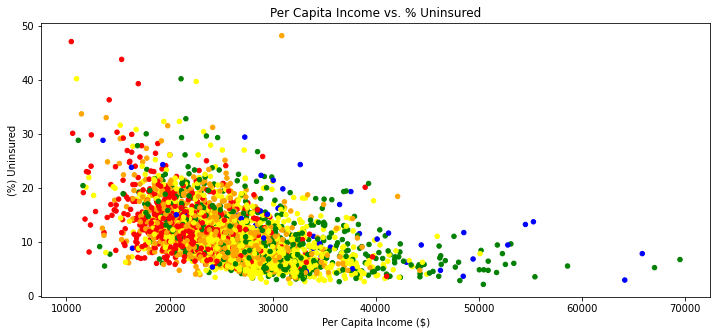

In [39]:
all_county_stats_2017_df.plot(kind='scatter', x='per_capita_income_2017', y='uninsured_2017',c='prev_colorcode',figsize=(12,10))
plt.xlabel('Per Capita Income ($)')
plt.ylabel('(%) Uninsured')
plt.title('Per Capita Income vs. % Uninsured')
plt.subplots_adjust(bottom=0.5)
plt.show()

#### What is the correlation to education level?

##### High School

Finally, looking at education level, higher high school graduation rates generally show more insurance overage. This is likely due to the fact that most jobs require a high school diploma, and having a job makes you more likely to afford health insurance. Taking into account health prevalence, the distribution really varies suggesting that having a high school education or not doesn't have the strongest effect as a social determinant of health for diabetes.

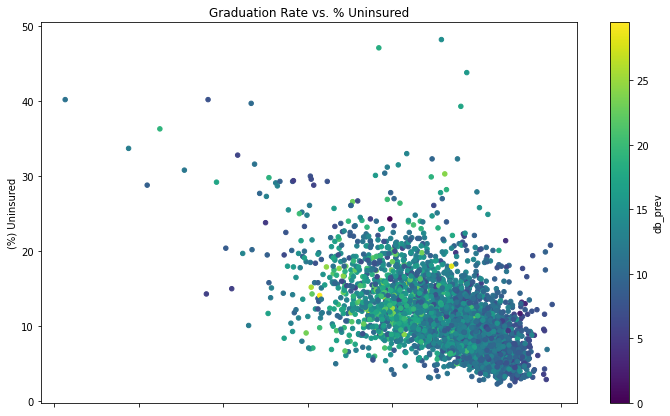

In [41]:
all_county_stats_2017_df.plot(kind='scatter', x='hs_grad_2017', y='uninsured_2017',c='db_prev',figsize=(12,7))
plt.xlabel('High School Graduation Rate (%)')
plt.ylabel('(%) Uninsured')
plt.title('Graduation Rate vs. % Uninsured')
plt.show()

##### Bachelor's Degree

On the other hand, having a bachelor's education has a more clear effect. Looking at prevalence by category, counties that have a greater population with higher education show much greater insurance coverage. Counties with very high prevalence tend to have less highly educated people and more people insured. All in all, this suggests that having a bachelor's education sets you up to be in a better financial place such that you can afford good care.

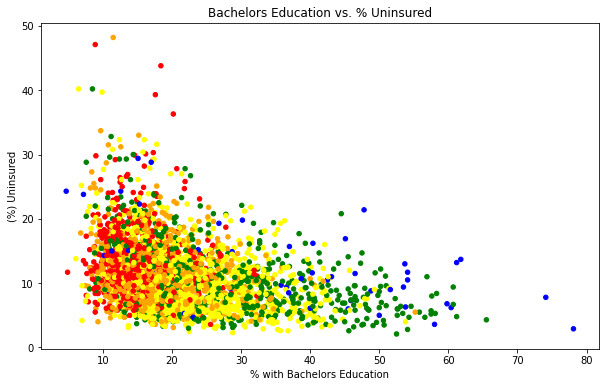

In [47]:
all_county_stats_2017_df.plot(kind='scatter', x='bachelors_2017', y='uninsured_2017',c='prev_colorcode',figsize=(10,6))
plt.xlabel('% with Bachelors Education')
plt.ylabel('(%) Uninsured')
plt.title('Bachelors Education vs. % Uninsured')
plt.show()

## **Conclusion**

In conclusion, it is clear that social determinants of health do have an impact on the health of disadvantaged groups, such that populations that are racial and ethnic minorities are more at risk based on their income, education level, and insurance coverage.

In states with the highest diabetes prevalence, Black populations had much greater mortality rates and much lower life expectancy compared to the state average despite being a small percentage of the total population.

County data also showed that counties with a higher population in poverty show higher diabetes prevalence. For counties with higher unemployment rates, diabetes prevalence tends to be greater suggesting that factors like poverty make minority groups more likely to be unemployed putting them at a disadvantage for diabetes. Similarly, counties with a higher median household income and per capita income have lower diabetes prevalence. This is likely correlated to better opportunities for education. More education, especially higher level, is correlated to less diabetes prevalence, greater income, and better insurance coverage.

As diabetes continues to affect populations across the country, policy makers should take into account the effect of social determinants of health that put minority groups at a disadvantage and work towards ameliorating these gaps so that these health inequities can finally be eliminated.